In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from random import shuffle
from tqdm import tqdm

TRAIN_DIR = "Datasets/Treino"
TEST_DIR = "Datasets/Teste"
IMG_SIZE_LINHA = 15
IMG_SIZE_COLUNA = 50
LEARNING_RATE = 0.01

NOME_MODELO = "LR-LPR-({}, {})-{}".format(IMG_SIZE_LINHA, IMG_SIZE_COLUNA, LEARNING_RATE)

In [4]:
def create_labels(img_name):
    """
    Pega o nome da imagem, separa os numeros da placa e gera um array para cada numero de 10 posições binarias (0 ou 1).
          0  1  2  3  4  5  6  7  8  9      
    0 = [ 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
    1 = [ 0, 1, 0, 0, 0, 0, 0, 0, 0, 0 ]
    2 = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ]
    3 = [ 0, 0, 0, 1, 0, 0, 0, 0, 0, 0 ]
    4 = [ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0 ]
    5 = [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 0 ]
    6 = [ 0, 0, 0, 0, 0, 0, 1, 0, 0, 0 ]
    7 = [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0 ]
    8 = [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 0 ]
    9 = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1 ]
    :param img: nome do arquivo da imagem.
    :return: um array de arrays, representando os numeros da placa.
    """
    label = [ [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
            ]
    for index, number in enumerate(img_name.split('.')[0]):
        label[index][int(number)] = 1
    return label

In [3]:
def create_train_data():
    training_data = []
    for img_name in tqdm(os.listdir(TRAIN_DIR)):
        label = create_labels(img_name)
        img = cv2.resize(cv2.imread(os.path.join(TRAIN_DIR, img_name), cv2.IMREAD_GRAYSCALE), (IMG_SIZE_COLUNA, IMG_SIZE_LINHA))
        numbers_array = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
        
        for linha in range(IMG_SIZE_LINHA):
            tmp = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
            for coluna in range(24, IMG_SIZE_COLUNA):
                if coluna <= 29:
                    tmp[0].append(img[linha][coluna])
                elif coluna <= 35:
                    tmp[1].append(img[linha][coluna])
                elif coluna <= 41:
                    tmp[2].append(img[linha][coluna])
                elif coluna <= 47:
                    tmp[3].append(img[linha][coluna])
                else:
                    continue
            numbers_array[0].append(tmp[0])
            numbers_array[1].append(tmp[1])
            numbers_array[2].append(tmp[2])
            numbers_array[3].append(tmp[3])
            
        # numbers_array[0] = np.array(numbers_array[0])
        # numbers_array[1] = np.array(numbers_array[1])
        # numbers_array[2] = np.array(numbers_array[2])
        # numbers_array[3] = np.array(numbers_array[3])
        
        for index, number_img in enumerate(numbers_array):
            training_data.append([np.array(number_img), np.array(label[index])])
    
    shuffle(training_data)
    np.save('training_data-30-03-({}, {})-{}.npy'.format(IMG_SIZE_LINHA, IMG_SIZE_COLUNA, LEARNING_RATE), training_data)
    return training_data
        
        

In [1]:
def create_test_data():
    testing_data = []
    for img_name in tqdm(os.listdir(TEST_DIR)):
        img = cv2.resize(cv2.imread(os.path.join(TEST_DIR, img_name), cv2.IMREAD_GRAYSCALE), (IMG_SIZE_COLUNA, IMG_SIZE_LINHA))
        numbers_array = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
        
        for linha in range(IMG_SIZE_LINHA):
            tmp = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
            for coluna in range(24, IMG_SIZE_COLUNA):
                if coluna <= 29:
                    tmp[0].append(img[linha][coluna])
                elif coluna <= 35:
                    tmp[1].append(img[linha][coluna])
                elif coluna <= 41:
                    tmp[2].append(img[linha][coluna])
                elif coluna <= 47:
                    tmp[3].append(img[linha][coluna])
                else:
                    continue
            numbers_array[0].append(tmp[0])
            numbers_array[1].append(tmp[1])
            numbers_array[2].append(tmp[2])
            numbers_array[3].append(tmp[3])
            
        # numbers_array[0] = np.array(numbers_array[0])
        # numbers_array[1] = np.array(numbers_array[1])
        # numbers_array[2] = np.array(numbers_array[2])
        # numbers_array[3] = np.array(numbers_array[3])
        for number_img in numbers_array:
            testing_data.append([np.array(number_img), img_name.split('.')[0]])
        np.save('testing_data-30-03-({}, {})-{}.npy'.format(IMG_SIZE_LINHA, IMG_SIZE_COLUNA, LEARNING_RATE), training_data)
        return testing_data

In [32]:
try:
    training_data = np.load('testing_data-30-03-({}, {})-{}.npy'.format(IMG_SIZE_LINHA, IMG_SIZE_COLUNA, LEARNING_RATE))
    print("Successfully Loaded.")
except IOError:
    training_data = create_train_data()


100%|██████████| 34/34 [00:00<00:00, 1545.94it/s]


<Figure size 432x288 with 0 Axes>

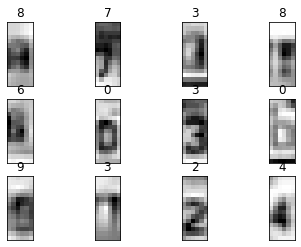

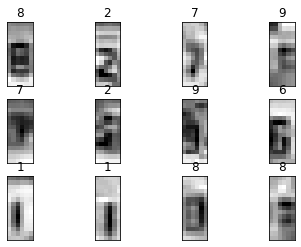

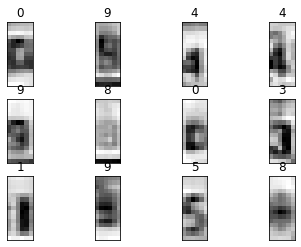

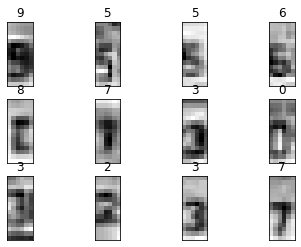

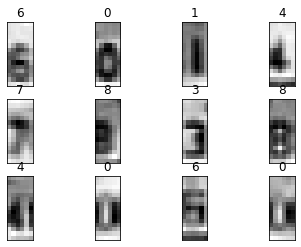

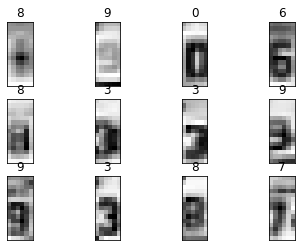

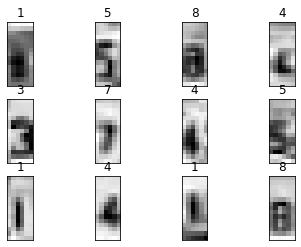

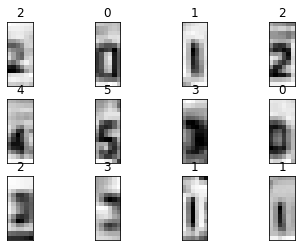

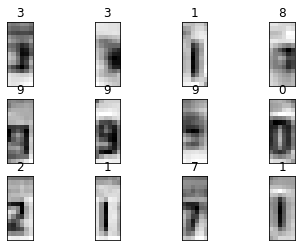

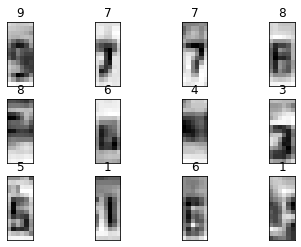

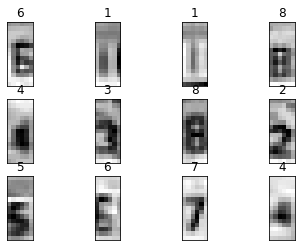

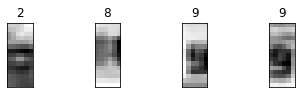

In [28]:
"""
    Demonstração do recorte das imagens.
"""
# fig = plt.figure()
# for index, num in enumerate(training_data):
#     if index % 12 == 0:
#         fig = plt.figure()
#     img_data = num[0]
#     img_label = num[1].argmax()
#     
#     y = fig.add_subplot(3, 4, (index)%12 + 1)
#     y.imshow(img_data, cmap="gray")
#     plt.title(img_label)
#     y.axes.get_xaxis().set_visible(False)
#     y.axes.get_yaxis().set_visible(False)
#     if index+1 % 12 == 0:
#         plt.show()
# plt.show()

In [33]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
# {64, 64, 128,128, 256,256, 512, 512}
convnet = input_data(shape=[None, IMG_SIZE_LINHA, IMG_SIZE_COLUNA, 1])

convnet = conv_2d(convnet, 64, 2, activation='relu', weights_init="xavier") # 64
convnet = conv_2d(convnet, 64, 2, activation='relu', weights_init="xavier") # 64
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 2, activation='relu', weights_init="xavier") # 128
convnet = conv_2d(convnet, 128, 2, activation='relu', weights_init="xavier") # 128
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 256, 2, activation='relu', weights_init="xavier") # 256
convnet = conv_2d(convnet, 256, 2, activation='relu', weights_init="xavier") # 256
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 512, 2, activation='relu', weights_init="xavier") # 512
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 512, 2, activation='relu', weights_init="xavier") # 512
convnet = max_pool_2d(convnet, 2)


convnet = fully_connected(convnet, 1024, activation='relu', weights_init=tflearn.initializations.truncated_normal(stddev=0.005))
convnet = dropout(convnet, 0.5)
convnet = fully_connected(convnet, 2048, activation='relu')
convnet = dropout(convnet, 0.5)

convnet = fully_connected(convnet, 10, activation='softmax', weights_init="xavier")
convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='target')

model = tflearn.DNN(convnet, tensorboard_dir='log')



In [34]:
train = training_data[:-27]
test = training_data[-27:]

In [ ]:
#X = np.array([i[0]])
